In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv('train.csv')

In [128]:
# 신고번호 신고일자 신고인부호 수입자부호 특송업체부호 관세율
df = df.drop(['신고일자','신고인부호', '특송업체부호','수입자부호'], axis=1)

In [129]:
#수입통관계획코드, 수입신고구분코드 label encoding
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = df['수입통관계획코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입통관계획코드'] = l_e_df

label = df['수입신고구분코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입신고구분코드'] = l_e_df

le = LabelEncoder()
label = df['원산지국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['원산지국가코드'] = l_e_df

le = LabelEncoder()
label = df['적출국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['적출국가코드'] = l_e_df

le = LabelEncoder()
label = df['관세율구분코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['관세율구분코드'] = l_e_df

In [130]:
df.sample(3)

,신고번호,통관지세관부호,해외거래처부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
8741,247683,40,NaN,1,1,11,21,11,5536.8,480065.84840,40,5041042,6204399000,27,19,0,13.0,0,0
83174,196638,10,S9GQC01,2,1,15,21,43,3838.3,614103.60050,10,8002046,6307200000,15,19,13,4.0,1,2
57774,479224,40,NaN,1,1,11,21,11,5401.6,37409.44835,40,4077009,3304999000,81,95,1,6.5,0,0


In [131]:
df = df.drop(['해외거래처부호'], axis=1)

### Feature Scaling 시작
#### 표준화

In [132]:
c=['신고번호', '통관지세관부호', '수입통관계획코드', '수입신고구분코드',
                                      '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','과세가격원화금액',
                                      '운송수단유형코드','반입보세구역부호','HS10단위부호','적출국가코드',
  '원산지국가코드','관세율구분코드', '관세율','우범여부','핵심적발']

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(data=df_scaled,columns=c)
print('feature 들의 평균 값')
print(df_scaled.mean())
print('\nfeature 들의 분산 값')
print(df_scaled.var())

feature 들의 평균 값
신고번호       -2.237319e-17
통관지세관부호    -2.340597e-15
수입통관계획코드   -6.493230e-16
수입신고구분코드    5.102847e-15
수입거래구분코드   -2.753314e-15
수입종류코드      1.479802e-15
징수형태코드     -3.510931e-16
신고중량(KG)    4.550283e-18
과세가격원화금액   -3.229653e-17
운송수단유형코드    2.693088e-15
반입보세구역부호   -1.024657e-16
HS10단위부호    2.246090e-16
적출국가코드      2.667959e-16
원산지국가코드     1.349279e-16
관세율구분코드    -2.403723e-15
관세율         1.204119e-15
우범여부       -3.530957e-15
핵심적발        3.963695e-15
dtype: float64

feature 들의 분산 값
신고번호        1.000011
통관지세관부호     1.000011
수입통관계획코드    1.000011
수입신고구분코드    1.000011
수입거래구분코드    1.000011
수입종류코드      1.000011
징수형태코드      1.000011
신고중량(KG)    1.000011
과세가격원화금액    1.000011
운송수단유형코드    1.000011
반입보세구역부호    1.000011
HS10단위부호    1.000011
적출국가코드      1.000011
원산지국가코드     1.000011
관세율구분코드     1.000011
관세율         1.000011
우범여부        1.000011
핵심적발        1.000011
dtype: float64


평균은 0, 분산은 1에 가깝다는데 평균은 어디가 0에 가깝다는 것인교??  
    
#### 정규화

In [134]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler() 
scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(data=df_scaled, columns=c)
print('feature들의 최소 값')
print(df_scaled.min())
print('\nfeature들의 최대 값')
print(df_scaled.max())

feature들의 최소 값
신고번호        0.0
통관지세관부호     0.0
수입통관계획코드    0.0
수입신고구분코드    0.0
수입거래구분코드    0.0
수입종류코드      0.0
징수형태코드      0.0
신고중량(KG)    0.0
과세가격원화금액    0.0
운송수단유형코드    0.0
반입보세구역부호    0.0
HS10단위부호    0.0
적출국가코드      0.0
원산지국가코드     0.0
관세율구분코드     0.0
관세율         0.0
우범여부        0.0
핵심적발        0.0
dtype: float64

feature들의 최대 값
신고번호        1.0
통관지세관부호     1.0
수입통관계획코드    1.0
수입신고구분코드    1.0
수입거래구분코드    1.0
수입종류코드      1.0
징수형태코드      1.0
신고중량(KG)    1.0
과세가격원화금액    1.0
운송수단유형코드    1.0
반입보세구역부호    1.0
HS10단위부호    1.0
적출국가코드      1.0
원산지국가코드     1.0
관세율구분코드     1.0
관세율         1.0
우범여부        1.0
핵심적발        1.0
dtype: float64


In [135]:
df_scaled

,신고번호,통관지세관부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
0,0.056021,0.208333,0.166667,0.000000,0.047059,0.416667,0.255814,0.019165,7.215039e-08,0.375,0.212110,0.427051,0.176471,0.191919,0.000000,0.009996,0.0,0.0
1,0.286404,0.069444,0.166667,0.333333,0.047059,0.416667,0.255814,0.036564,3.547561e-06,0.000,0.206924,0.978864,0.176471,0.191919,0.000000,0.009996,0.0,0.0
2,0.093281,0.000000,0.666667,0.333333,0.976471,0.416667,0.255814,0.001124,3.726652e-07,0.375,0.965651,0.896122,0.176471,0.191919,0.371429,0.003999,1.0,1.0
3,0.822769,0.069444,0.166667,0.333333,0.047059,0.416667,0.255814,0.020328,2.581435e-05,0.000,0.206924,0.294898,0.176471,0.191919,0.371429,0.000000,0.0,0.0
4,0.435737,0.208333,0.666667,0.333333,0.047059,0.416667,0.255814,0.020920,7.240685e-06,0.000,0.068980,0.635512,0.176471,0.191919,0.000000,0.016244,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89614,0.428227,0.069444,0.500000,0.333333,0.000000,0.416667,0.325581,0.018754,4.032620e-06,0.000,0.069252,0.343677,0.952941,0.959596,0.028571,0.008122,1.0,1.0
89615,0.089687,0.208333,0.166667,0.333333,0.047059,0.416667,0.255814,0.023366,4.642939e-06,0.000,0.068980,0.844680,0.176471,0.191919,0.371429,0.000000,0.0,0.0
89616,0.963230,0.069444,0.333333,0.333333,0.047059,0.416667,0.255814,0.021671,4.491816e-06,0.375,0.214098,0.333555,0.952941,0.959596,0.028571,0.008122,0.0,0.0
89617,0.520626,0.041667,0.333333,0.333333,0.000000,0.416667,0.255814,0.024000,5.945520e-08,0.000,0.212098,0.398306,0.364706,0.191919,0.028571,0.008122,0.0,0.0


In [136]:
# 학습
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [137]:
c=['신고번호', '통관지세관부호', '수입통관계획코드', '수입신고구분코드',
                                      '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','과세가격원화금액',
                                      '운송수단유형코드','반입보세구역부호','HS10단위부호','적출국가코드',
  '원산지국가코드','관세율구분코드', '관세율']

X = np.array(pd.DataFrame(df_scaled, columns=c))
X = X.astype('int')

In [138]:
Y_1 = np.array(pd.DataFrame(df_scaled, columns=['우범여부']))
Y_1 = Y_1.astype('int')
Y_2 = np.array(pd.DataFrame(df_scaled, columns=['핵심적발']))
Y_2 = Y_2.astype('int')

In [139]:
# 우범여부 데이터 분할
X_train, X_test, y1_train, y1_test = train_test_split(X, Y_1, test_size=0.2, random_state=11)
# 데이터 학습
dt_clf_1 = DecisionTreeClassifier(max_depth=150, random_state=11)
dt_clf_1 = dt_clf_1.fit(X_train, y1_train)

# 핵심적발 데이터 분할
X_train, X_test, y2_train, y2_test = train_test_split(X, Y_2, test_size=0.2, random_state=11)
#데이터 학습
dt_clf_2 = DecisionTreeClassifier(max_depth=150, random_state=11)
dt_clf_2 = dt_clf_2.fit(X_train, y2_train)

In [140]:
dt_prediction_1 = dt_clf_1.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

print("정밀도:", precision_score(y1_test, dt_prediction_1))
print("재현율:", recall_score(y1_test, dt_prediction_1))
f1 = f1_score(y1_test, dt_prediction_1)
print("F1 스코어: {0:.4f}".format(f1))

정밀도: 0.577639751552795
재현율: 0.023919753086419752
F1 스코어: 0.0459


feature importances:
[0.    0.019 0.176 0.224 0.081 0.007 0.389 0.002 0.001 0.078 0.007 0.
 0.    0.008 0.006 0.002]
신고번호 : 0.000
통관지세관부호 : 0.019
수입통관계획코드 : 0.176
수입신고구분코드 : 0.224
수입거래구분코드 : 0.081
수입종류코드 : 0.007
징수형태코드 : 0.389
신고중량(KG) : 0.002
과세가격원화금액 : 0.001
운송수단유형코드 : 0.078
반입보세구역부호 : 0.007
HS10단위부호 : 0.000
적출국가코드 : 0.000
원산지국가코드 : 0.008
관세율구분코드 : 0.006
관세율 : 0.002


<AxesSubplot:>

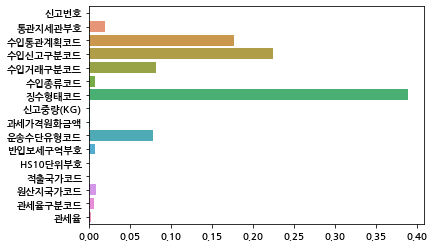

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

print("feature importances:\n{0}".format(np.round(dt_clf_1.feature_importances_,3)))

for name, value in zip(c, dt_clf_1.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x=dt_clf_1.feature_importances_, y=c)

### test.csv

In [145]:
# 테스트 데이터 불러오기
t_df = pd.read_csv('test.csv')

In [146]:
# 신고번호 신고일자 신고인부호 수입자부호 특송업체부호 관세율
t_df = t_df.drop(['신고일자','신고인부호', '특송업체부호','수입자부호'], axis=1)

In [147]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = t_df['수입통관계획코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['수입통관계획코드'] = l_e_df


label = t_df['수입신고구분코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['수입신고구분코드'] = l_e_df

le = LabelEncoder()
label = t_df['원산지국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['원산지국가코드'] = l_e_df

le = LabelEncoder()
label = t_df['적출국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['적출국가코드'] = l_e_df

le = LabelEncoder()
label = t_df['관세율구분코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns = ['label_encoded'])
t_df['관세율구분코드'] = l_e_df

In [148]:
t_df = t_df.drop(['해외거래처부호'], axis=1)

In [149]:
t_df.sample(3)

,신고번호,통관지세관부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율
2428,515225,16,2,1,11,21,11,2314.0,62063.39575,10,4002001,3004909900,68,75,0,8.0
143,520143,40,2,1,11,21,11,5234.7,168100.88840,10,3078041,6204420000,14,18,0,13.0
5889,876680,13,1,1,11,21,11,3636.3,75764.35584,10,4076003,9603900000,36,41,0,8.0


In [150]:
X_test = np.array(pd.DataFrame(t_df, columns = c))
t_dt_prediction_1 = dt_clf_1.predict(X_test)
t_dt_prediction_2 = dt_clf_2.predict(X_test)

In [151]:
test_result = pd.DataFrame()
test_result['신고번호'] = t_df['신고번호']
test_result['우범여부'] = t_dt_prediction_1
test_result['핵심적발'] = t_dt_prediction_2

test_result

,신고번호,우범여부,핵심적발
0,982834,0,0
1,828961,0,0
2,522066,0,0
3,999547,0,0
4,919320,0,0
...,...,...,...
10268,857321,0,0
10269,621501,0,0
10270,998367,0,0
10271,697376,0,0
